In [1]:
# description       : Predict Tweet classification (Text based)
# ML Models used    : Naive bayes, Support Vector Machine
# author            : raulsainz
# email             : 
# date              : 20210327
# version           : 0.1
#==============================================================================

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from myFuntcions.basic import *
%load_ext autoreload
%autoreload 2

* *Bernoulli Naive Bayes* : It assumes that all our features are binary such that they take only two values. Means 0s can represent “word does not occur in the document” and 1s as "word occurs in the document" .

* *Multinomial Naive Bayes* : Its is used when we have discrete data (e.g. movie ratings ranging 1 and 5 as each rating will have certain frequency to represent). In text learning we have the count of each word to predict the class or label.

* *Gaussian Naive Bayes* : Because of the assumption of the normal distribution, Gaussian Naive Bayes is used in cases when all our features are continuous. For example in Iris dataset features are sepal width, petal width, sepal length, petal length. So its features can have different values in data set as width and length can vary. We can’t represent features in terms of their occurrences. This means data is continuous. Hence we use Gaussian Naive Bayes here.

In [5]:
#Setup pandas display parameters
pd.options.display.max_columns = 50
pd.options.display.max_rows = 200
pd.options.display.max_colwidth= 100
pd.options.display.precision = 3

In [6]:
#Set Seaborn Plot enviroment
sns.set()
sns.set_context('notebook',rc={"grid.linewidth": 5})
sns.set_style("whitegrid")
colors = ["#345E6F","#264653","#287271","#2a9d8f","#e9c46a","#efb366","#f4a261","#ee8959","#e76f51","#e87153","#e97c61", '#902C14']
bin_colors = ["#264653","#2A9D8F","#ee8959","#e97c61"]
sns.set_palette(sns.color_palette(colors))
mul_palette = sns.color_palette(colors)
bin_palette = sns.color_palette(bin_colors)
sns.set(rc={'figure.figsize':(10,5)}, font_scale=1.5)
sns.set_style({'axes.facecolor':'white', 'grid.color': '.8','grid.linestyle': '--'})

In [7]:
#read CSV Data set
df01 = loadDataSet('Tweets.csv',sample_size=0.3)

[04/07/2021-12:45:01]: OK: succesfuly loaded data frame -- rows: 14640 - columns: 15.
[04/07/2021-12:45:01]: sampling data frame at 30.0% -- rows: 4392 - columns: 15.
[04/07/2021-12:45:01]: WARNING: Null Values Found!!
[04/07/2021-12:45:01]: Column negativereason has 1710 (38.93%) Null values.
[04/07/2021-12:45:01]: Column negativereason_confidence has 1293 (29.44%) Null values.
[04/07/2021-12:45:01]: Column airline_sentiment_gold has 4383 (99.80%) Null values.
[04/07/2021-12:45:01]: Column negativereason_gold has 4385 (99.84%) Null values.
[04/07/2021-12:45:01]: Column tweet_coord has 4097 (93.28%) Null values.
[04/07/2021-12:45:01]: Column tweet_location has 1412 (32.15%) Null values.
[04/07/2021-12:45:01]: Column user_timezone has 1401 (31.90%) Null values.


In [8]:
df01.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
13349,569884438504427520,negative,1.00,longlines,0.665,American,NaN,nataliadarling,NaN,0,"@AmericanAir I've been in line for over half hour trying to see a representative, now I might ev...",NaN,2015-02-23 07:40:12 -0800,⋆city of lost angels⋆,Central Time (US & Canada)
235,569200619430420480,positive,0.67,NaN,NaN,Virgin America,NaN,ninjasistah,NaN,0,@VirginAmerica I’m looking forward to watching the Oscars on my flight home tomorrow. I might ev...,NaN,2015-02-21 10:22:57 -0800,Massachusetts,Eastern Time (US & Canada)
12172,570270435478122497,positive,1.00,NaN,NaN,American,NaN,beckyw618,NaN,0,@AmericanAir Thanks so much!,NaN,2015-02-24 09:14:01 -0800,NaN,NaN
5192,569264328186179584,negative,1.00,Cancelled Flight,0.671,Southwest,NaN,amy_ginsburg,NaN,0,@SouthwestAir reservation (FEHQNE) 21FEB15 | DCA-RSW. Want refund not credit for Cancelled Fli...,NaN,2015-02-21 14:36:06 -0800,"North Bethesda, MD",Atlantic Time (Canada)
905,570022345424834560,negative,1.00,Late Flight,0.656,United,NaN,hefeman,NaN,0,@united has made my no fly list. Other airlines wait when connector Late Flight. Stuck in IAH.,NaN,2015-02-23 16:48:12 -0800,Austin,Central Time (US & Canada)


In [9]:
#Check for null values on all columns
pd.DataFrame({
                'unicos':df01.nunique(),
                'missing total': df01.isna().sum(),
                'missing %': df01.isna().sum()/df01.count(),
                'tipo':df01.dtypes})

,unicos,missing total,missing %,tipo
tweet_id,3759,0,0.000,int64
airline_sentiment,3,0,0.000,object
airline_sentiment_confidence,575,0,0.000,float64
negativereason,10,1710,0.638,object
negativereason_confidence,794,1293,0.417,float64
airline,6,0,0.000,object
airline_sentiment_gold,3,4383,487.000,object
name,2959,0,0.000,object
negativereason_gold,4,4385,626.429,object
retweet_count,10,0,0.000,int64


In [10]:
df01.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [11]:
df01['airline_sentiment'].value_counts(normalize=True)

negative    0.611
neutral     0.215
positive    0.174
Name: airline_sentiment, dtype: float64

<AxesSubplot:>

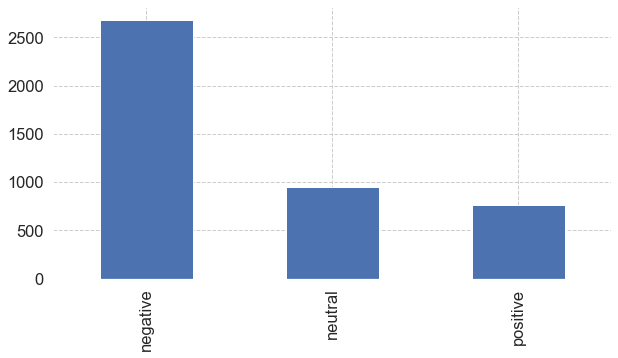

In [12]:
df01['airline_sentiment'].value_counts().plot(kind='bar')

In [13]:
df01.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
13349,569884438504427520,negative,1.00,longlines,0.665,American,NaN,nataliadarling,NaN,0,"@AmericanAir I've been in line for over half hour trying to see a representative, now I might ev...",NaN,2015-02-23 07:40:12 -0800,⋆city of lost angels⋆,Central Time (US & Canada)
235,569200619430420480,positive,0.67,NaN,NaN,Virgin America,NaN,ninjasistah,NaN,0,@VirginAmerica I’m looking forward to watching the Oscars on my flight home tomorrow. I might ev...,NaN,2015-02-21 10:22:57 -0800,Massachusetts,Eastern Time (US & Canada)
12172,570270435478122497,positive,1.00,NaN,NaN,American,NaN,beckyw618,NaN,0,@AmericanAir Thanks so much!,NaN,2015-02-24 09:14:01 -0800,NaN,NaN
5192,569264328186179584,negative,1.00,Cancelled Flight,0.671,Southwest,NaN,amy_ginsburg,NaN,0,@SouthwestAir reservation (FEHQNE) 21FEB15 | DCA-RSW. Want refund not credit for Cancelled Fli...,NaN,2015-02-21 14:36:06 -0800,"North Bethesda, MD",Atlantic Time (Canada)
905,570022345424834560,negative,1.00,Late Flight,0.656,United,NaN,hefeman,NaN,0,@united has made my no fly list. Other airlines wait when connector Late Flight. Stuck in IAH.,NaN,2015-02-23 16:48:12 -0800,Austin,Central Time (US & Canada)


In [14]:
df01["sentiment_positive"] = np.where(df01["airline_sentiment"] != 'negative' , 1, 0)

In [15]:
df01['retweet_count'].value_counts()

0     4157
1      203
2       18
3        5
5        2
18       2
11       2
4        1
6        1
15       1
Name: retweet_count, dtype: int64

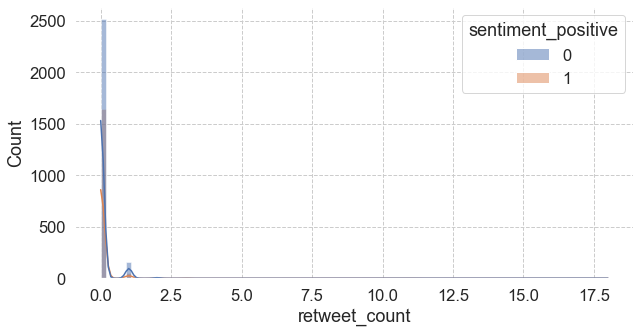

In [16]:
ax = sns.histplot(data = df01 , x ='retweet_count', hue = 'sentiment_positive', kde = True, bins = 100)

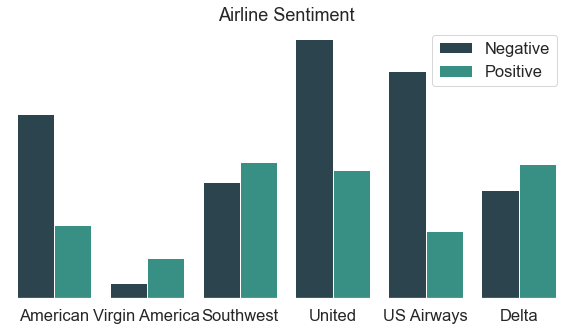

In [17]:
#create plot
ax = sns.countplot(x = 'airline' ,hue='sentiment_positive', data = df01 ,palette = bin_palette)

ax.set(xlabel = "",title = 'Airline Sentiment')
#set legends friendly name
ax.legend(['Negative', 'Positive'])
#ax.set_xticklabels(['Disloyal','Loyal'])
#Hide Y labels
ax.axes.yaxis.set_visible(False)


In [20]:
airline_dummy = pd.get_dummies(df01['airline'])
airline_dummy 

df01 = df01.merge(airline_dummy,left_index=True,right_index=True)

In [23]:
df01.drop(['tweet_id','retweet_count','airline_sentiment','airline','airline_sentiment_gold','negativereason_gold','negativereason_confidence','tweet_coord','tweet_created','tweet_location','name','airline_sentiment_confidence','user_timezone','negativereason'], axis='columns', inplace=True)
df01.dtypes

text                  object
sentiment_positive     int64
American_x             uint8
Delta_x                uint8
Southwest_x            uint8
US Airways_x           uint8
United_x               uint8
Virgin America_x       uint8
American_y             uint8
Delta_y                uint8
Southwest_y            uint8
US Airways_y           uint8
United_y               uint8
Virgin America_y       uint8
dtype: object

In [24]:
df01.head()

,text,sentiment_positive,American_x,Delta_x,Southwest_x,US Airways_x,United_x,Virgin America_x,American_y,Delta_y,Southwest_y,US Airways_y,United_y,Virgin America_y
0,@VirginAmerica What @dhepburn said.,1,0,0,0,0,0,1,0,0,0,0,0,1
0,@VirginAmerica What @dhepburn said.,1,0,0,0,0,0,1,0,0,0,0,0,1
0,@VirginAmerica What @dhepburn said.,1,0,0,0,0,0,1,0,0,0,0,0,1
0,@VirginAmerica What @dhepburn said.,1,0,0,0,0,0,1,0,0,0,0,0,1
0,@VirginAmerica What @dhepburn said.,1,0,0,0,0,0,1,0,0,0,0,0,1


# Text Processing and Document Matrix

In [29]:
#libraries for text analysis and extraction
import string
import re
import demoji                                                   #find or remove emojis from a blob of text.
from sklearn.feature_extraction.text import CountVectorizer
#import nltk #provides a set of diverse natural languages algorithms, used for tokenizing
from nltk.stem.porter import PorterStemmer
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from yellowbrick.text import FreqDistVisualizer

In [30]:
# To Lower
df01['text'] = df01['text'].str.lower()
df01.text.head(20)

0                                         @virginamerica what @dhepburn said.
0                                         @virginamerica what @dhepburn said.
0                                         @virginamerica what @dhepburn said.
0                                         @virginamerica what @dhepburn said.
0                                         @virginamerica what @dhepburn said.
0                                         @virginamerica what @dhepburn said.
0                                         @virginamerica what @dhepburn said.
0                                         @virginamerica what @dhepburn said.
0                                         @virginamerica what @dhepburn said.
0                                         @virginamerica what @dhepburn said.
0                                         @virginamerica what @dhepburn said.
0                                         @virginamerica what @dhepburn said.
0                                         @virginamerica what @d

In [31]:
#Find all the hashtags
df01['hashtag'] = df01['text'].apply(lambda x: re.findall(r'#(\w+)', x))

In [33]:
#Replace emojis with emoji description
df01['text'] = df01['text'].apply(lambda tweet: demoji.replace_with_desc(tweet, ""))

In [34]:
 # Removes URL's 
df01['text'] = df01['text'].apply(lambda x: re.sub(r'http\S+', '', x))

In [35]:
#Striping punctuation
df01['text'] = df01['text'].str.replace('[{}]'.format(string.punctuation), '') # Removes punctuation


ipykernel_launcher:2: FutureWarning: The default value of regex will change from True to False in a future version.


In [36]:
df01['text'] = df01['text'].str.replace('[0-9]'.format(string.punctuation), '') # Removes Numbers

ipykernel_launcher:1: FutureWarning: The default value of regex will change from True to False in a future version.


In [37]:
df01.text.head(20)

0                                      virginamerica what dhepburn said
0                                      virginamerica what dhepburn said
0                                      virginamerica what dhepburn said
0                                      virginamerica what dhepburn said
0                                      virginamerica what dhepburn said
0                                      virginamerica what dhepburn said
0                                      virginamerica what dhepburn said
0                                      virginamerica what dhepburn said
0                                      virginamerica what dhepburn said
0                                      virginamerica what dhepburn said
0                                      virginamerica what dhepburn said
0                                      virginamerica what dhepburn said
0                                      virginamerica what dhepburn said
0                                      virginamerica what dhepbu

In [38]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['͡°','……','ʖ','-gt'])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [39]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop  = lambda word: word not in stop_words
single_char  = lambda word: len(word)>1
steam = lambda word: stemmer.stem(word)
def mytokenizer(sentence):
    tokens = word_tokenize(sentence)
    #print(tokens)
    new = list(filter(stop, tokens))
    new = list(filter(single_char, new))
    new = list(map(steam, new))
    return new

In [40]:
# Full document-term matrix for title
cv = CountVectorizer(tokenizer=mytokenizer)
tweets_dtm = cv.fit_transform(df01.text) #Document term matrix for title
tweets_names = cv.get_feature_names() # Get feature names

In [41]:
# Create Document Matrix
DocumentMatrix = pd.DataFrame(tweets_dtm.toarray(), columns=tweets_names)
print(DocumentMatrix.shape)

(16982, 4997)


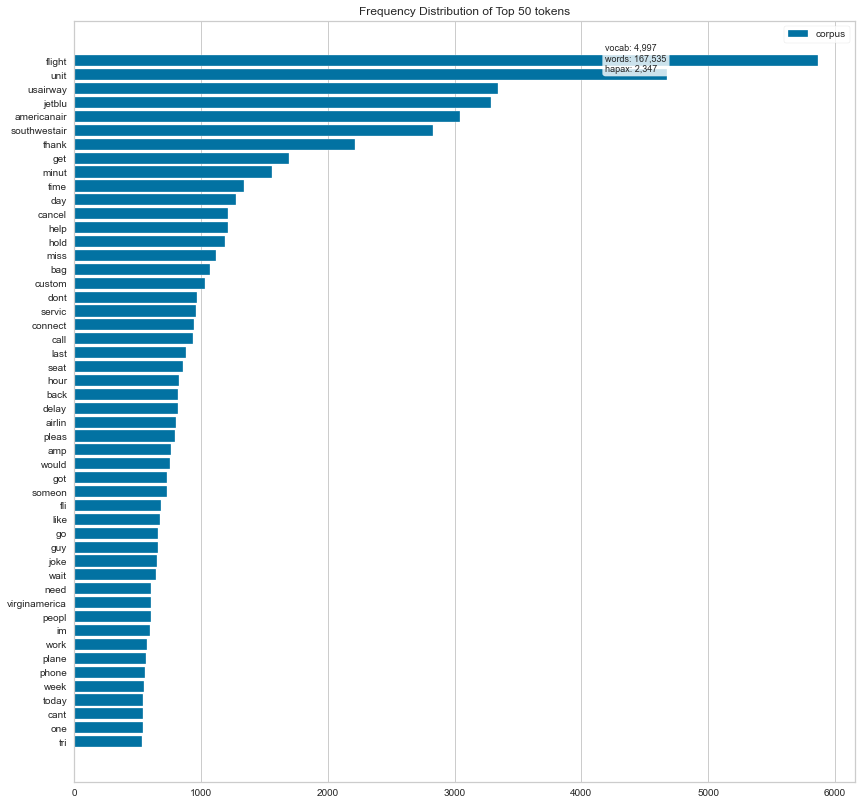

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [42]:
#Create word distribution plot
plt.figure(figsize=(14, 14))
visualizer = FreqDistVisualizer(features=tweets_names, orient='h')
visualizer.fit(tweets_dtm)
visualizer.show()

In [43]:
uni = pd.DataFrame({ 
            'unicos':DocumentMatrix.nunique(),
})
uni[uni.unicos>2].tail(30)

,unicos
us,3
usair,3
usairway,4
use,4
valid,3
vega,3
via,3
virginamerica,3
voucher,3
wait,3


# Model Building

In [45]:
#Import ML models t be used
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
#Libraries for model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
#Libraries for model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [130]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True, desc = 'No name model',labels = ['True','False']):
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    model_acc = metrics.accuracy_score(y_test, y_pred )  # Model Accuracy, how often is the classifier correct?
    print("Accuracy = {}".format(model_acc)) 
    print("ROC_AUC = {}".format(roc_auc))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.PuBuGn, normalize = 'all', display_labels=labels, values_format = '.2%')  
    model_results[len(model_results)] = {
        'model':    type(model_nb1),
        'roc_auc':  roc_auc,
        'model_acc':model_acc,
        'description':desc
    }

## Model #1 - Multinomial NB on word count

In [169]:
#Define initial model parameters
cv_n_split = 3
random_state = 42
test_train_split = 0.25
cv_iter = 5
# Create empty list with models results
model_results = {}

In [132]:
DocumentMatrix.shape

(16982, 4997)

In [133]:
X = df01.merge(DocumentMatrix,left_index=True,right_index=True)
X.drop(['text_x'], axis='columns', inplace=True)
X.shape

(16982, 5011)

In [170]:
#Split the data into DV and IV's
X = DocumentMatrix
y = df01['sentiment_positive']
y_labels = ['Positive','Negative']
print(X.shape)
print(y.shape)


(16982, 4997)
(16982,)


In [171]:
#split into raining and test
X_train,X_test, y_train,y_test = train_test_split(X , y , random_state = random_state, shuffle = True, test_size = test_train_split)

Accuracy = 0.9413565708902496
ROC_AUC = 0.9383655419866549
              precision    recall  f1-score   support

           0    0.93257   0.96450   0.94827      2366
           1    0.95331   0.91223   0.93232      1880

    accuracy                        0.94136      4246
   macro avg    0.94294   0.93837   0.94029      4246
weighted avg    0.94175   0.94136   0.94120      4246



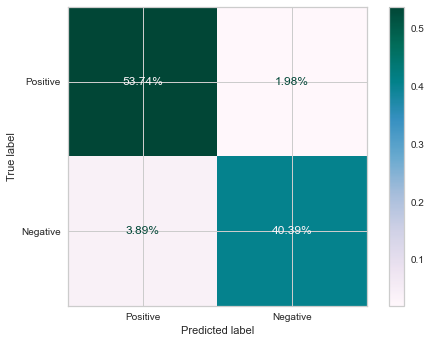

In [172]:
#Create a Multinomial Naive Bayes Classifier
run_model(MultinomialNB(), X_train, y_train, X_test, y_test,desc = 'Multinomial NB on word count', labels = y_labels)

# Model # 2 Bernoulli NB on bool values

In [173]:
#Transform all count values to True | False
DocumentMatrix_bool = DocumentMatrix.apply(lambda x: [True if y >0 else False for y in x])
DocumentMatrix_bool.head()

,aa,aaalwaysl,aaba,aacustomerservic,aadelay,aadfw,aadvantag,aafail,aampc,aaron,aarp,ab,abandon,abcletjetbluestreamfe,abcnetwork,abcnew,abduct,abi,abigailedg,abil,abl,aboard,aboout,abq,abroad,...,youareonyourown,youd,youll,young,your,yourairlinesuck,yousuck,yout,youv,you…i,yr,yuma,yup,yvonn,yvr,yyz,zackscom,zakkohan,zero,zip,zone,zrh,zurich,͜ʖ,—gt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Accuracy = 0.946773433820066
ROC_AUC = 0.944864975450082
              precision    recall  f1-score   support

           0    0.94398   0.96154   0.95268      2366
           1    0.95044   0.92819   0.93918      1880

    accuracy                        0.94677      4246
   macro avg    0.94721   0.94486   0.94593      4246
weighted avg    0.94684   0.94677   0.94670      4246



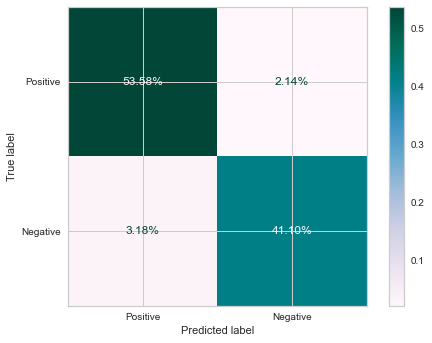

In [174]:
#Split the data into DV and IV's
X = DocumentMatrix_bool
y = df01['sentiment_positive']
#split into raining and test
X_train,X_test, y_train,y_test = train_test_split(X , y , random_state = random_state, shuffle = True, test_size = test_train_split)
#Run a Gaussian Classifier
run_model(BernoulliNB(), X_train, y_train, X_test, y_test,desc='Bernoulli NB on bool values',labels = y_labels)

# Model 3 - Multinomial NB on TFIDF

In [155]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(tweets_dtm)
tfidf = tfidf_transformer.transform(tweets_dtm)

In [156]:
# Create Document Matrix
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=tweets_names,columns=["idf_weights"])
#DocumentMatrix_title = pd.DataFrame(x.toarray(), columns=title_names)
df_idf.head()
#print(DocumentMatrix_title.shape)

,idf_weights
aa,4.975
aaalwaysl,10.047
aaba,7.907
aacustomerservic,10.047
aadelay,7.907


In [158]:
df_tfidf = pd.DataFrame(tfidf.toarray(), columns=tweets_names)
#df_tfidf_title.sort_values(by='aacustomerservic', ascending=False)

Accuracy = 0.9420631182289213
ROC_AUC = 0.9380708080789915
              precision    recall  f1-score   support

           0    0.92673   0.97295   0.94928      2366
           1    0.96368   0.90319   0.93245      1880

    accuracy                        0.94206      4246
   macro avg    0.94520   0.93807   0.94087      4246
weighted avg    0.94309   0.94206   0.94183      4246



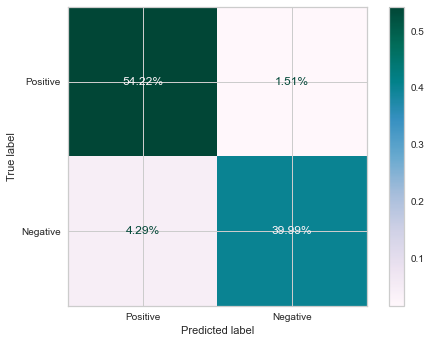

In [175]:
#Split the data into DV and IV's
X = df_tfidf
y = df01['sentiment_positive']
#split into raining and test
X_train,X_test, y_train,y_test = train_test_split(X , y , random_state = random_state, shuffle = True, test_size = test_train_split)
#Create a GaussianNB Classifier
model_nb5 = MultinomialNB()
run_model(MultinomialNB(), X_train, y_train, X_test, y_test, desc = 'Multinomial NB on TFIDF' , labels = y_labels)

# Model 6 - Suport Vector Machine

Accuracy = 0.9583137070183703
ROC_AUC = 0.9581154115933166
              precision    recall  f1-score   support

           0    0.96515   0.95985   0.96249      2366
           1    0.94982   0.95638   0.95309      1880

    accuracy                        0.95831      4246
   macro avg    0.95748   0.95812   0.95779      4246
weighted avg    0.95836   0.95831   0.95833      4246



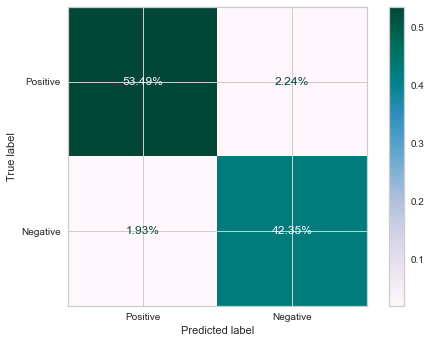

In [176]:
#Split the data into DV and IV's
X = DocumentMatrix
y = df01['sentiment_positive']
#split into raining and test
X_train,X_test, y_train,y_test = train_test_split(X , y , random_state = random_state, shuffle = True, test_size = test_train_split)
#Create a SVC Classifier
model_svm1 = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
run_model(model_svm1, X_train, y_train, X_test, y_test, desc = 'Suport Vector Machine' , labels = y_labels)

In [177]:
#Split the data into DV and IV's
X = DocumentMatrix
y = df01['sentiment_positive']
print(X.shape)
print(y.shape)
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=random_state)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16982, 4997)
(16982,)
(12736, 4997)
(4246, 4997)
(12736,)
(4246,)


In [178]:
#Define initial model parameters
cv_n_split = 3
random_state = 42
test_train_split = 0.25
cv_iter = 5

classifier = [ SVC(random_state = random_state) ]

nb_grid = {
    'alpha': np.array([1,0.1,0.01,0.001,0.0001,0])
}

svc_grid = {'C': [0.1,1, 10, 100], 
            'gamma': [1,0.1,0.01,0.001],
            'kernel': ['rbf', 'poly', 'sigmoid']
            }

classifier_params = [ svc_grid ]

In [181]:
cv_result=[]
best_estimators=[]
# Splitting train data for model tuning with cross-validation
cv_train_shuffle    =   ShuffleSplit(n_splits=cv_n_split, test_size=test_train_split, random_state=random_state)
cv_train_stratified =   StratifiedKFold(n_splits=cv_n_split, shuffle=True, random_state=random_state)

for i in range(len(classifier)):
    #clf=GridSearchCV(classifier[i], param_grid=classifier_params[i], cv=cv_train_shuffle, scoring="accuracy", n_jobs=-1, verbose=1, refit=False, n_iter= cv_iter)
    logMessage('Begin Grid Search for {} '.format(classifier[i]),3)
    clf=RandomizedSearchCV(classifier[i], param_distributions=classifier_params[i], cv=cv_n_split, scoring="accuracy", n_jobs=-1, verbose=1, refit=False, n_iter= cv_iter)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

[04/07/2021-14:14:38]: WARNING: Begin Grid Search for SVC(random_state=42) 


TypeError: __init__() got an unexpected keyword argument 'param_distributionsdict'

In [ ]:
sum_words_desc = bow_desc.sum(axis=0)
words_freq_desc = [(word, sum_words_desc[0, idx]) for word, idx in     cv.vocabulary_.items()]
words_freq_desc = sorted(words_freq_desc, key = lambda x: x[1], reverse=True)
print("{} in description".format(sum_words_desc))

In [102]:
from sklearn.feature_extraction.text  import TfidfTransformer 
#Full document-term matrix for title
cv = CountVectorizer(tokenizer=mytokenizer)
tdm_title = cv.fit_transform(df.Title) #Get term document matrix
title_names = cv.get_feature_names() # Get feature names

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(tdm_title)
# print idf values 
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=title_names,columns=["weights"]) 
 
# sort ascending 
df_idf.sort_values(by=['weights'])





,weights
ap,3.787
us,3.886
new,4.353
ltbgtltbgt,4.594
oil,4.690
...,...
iaea,7.398
ice,7.398
ichiro,7.398
hussein,7.398


In [103]:
# count matrix 
count_vector=cv.transform(df.Title) 
 
# tf-idf scores 
tf_idf_vector=tfidf_transformer.transform(count_vector)

In [106]:
feature_names = cv.get_feature_names() 
 
#get tfidf vector for first document 
first_document_vector=tf_idf_vector[0] 
 
print(first_document_vector)

  (0, 2599)	0.43832355179560434
  (0, 2369)	0.5147699951158982
  (0, 1706)	0.4865558874410917
  (0, 1210)	0.40277797989860387
  (0, 563)	0.3793647102392048


In [107]:
#print the scores 
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
srinagar,0.515
number,0.487
troop,0.438
india,0.403
cut,0.379
...,...
freez,0.000
french,0.000
freshman,0.000
fret,0.000
